In [1]:
#imported packages such as pandas, numpy, matploblib and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle, islice

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics

# Models from Scikit-Learn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

#settings
pd.options.display.float_format = '{:.2f}'.format

Data Exploration

In [2]:
df = pd.read_csv('banking.csv') #read dataset csv

In [3]:
df.head() #check 5 columns of dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [4]:
df.dtypes #check data type

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.info(null_counts=True) #check null counts of each feature/column

C:\Users\hfara\AppData\Local\Temp\ipykernel_22012\3748855989.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True) #check null counts of each feature/column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().values.any() #check null values

False

In [7]:
{column: len(df[column].unique()) for column in df.columns} #check number of unique values/non duplicates in all columns

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

As these two columns are non-unique values
and are personal identifier ids we remove them

In [8]:
df = df.drop(['step','nameOrig', 'nameDest'], axis=1)

Check for target variable
Both variables label the transactions lets see
which one we can use

In [9]:
print(df['isFraud'].unique())
print(df['isFlaggedFraud'].unique())

[0 1]
[0 1]


[Text(0, 0, '6354407'), Text(0, 0, '8213')]

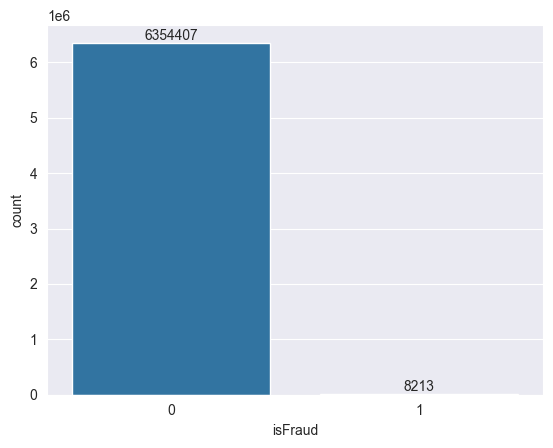

In [10]:
#check isFraud bar chart, Non Fraud vs Fraud (0,1)
ax = sns.countplot(x=df['isFraud'],
                   order=df['isFraud'].value_counts(ascending=False).index);
#plot nominal data frequency distribution
abs_values = df['isFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

[Text(0, 0, '6362604'), Text(0, 0, '16')]

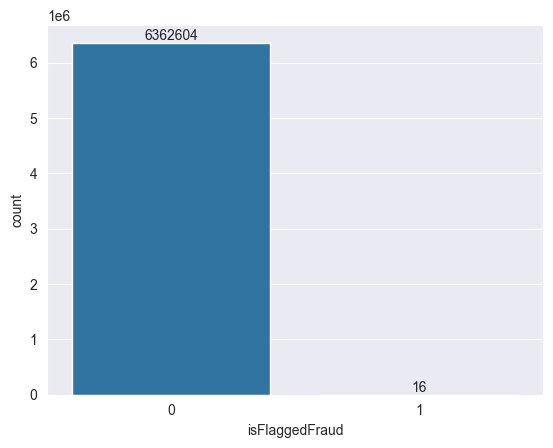

In [11]:
#check isFlaggedFraud, we need to remove this column
# as it doesn't classify the transactions as fraud
ax = sns.countplot(x=df['isFlaggedFraud'],
                   order=df['isFlaggedFraud'].value_counts(ascending=False).index);
#plot nominal data frequency distribution
abs_values = df['isFlaggedFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [12]:
print(df['type'].unique()) #check unique values in type column

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


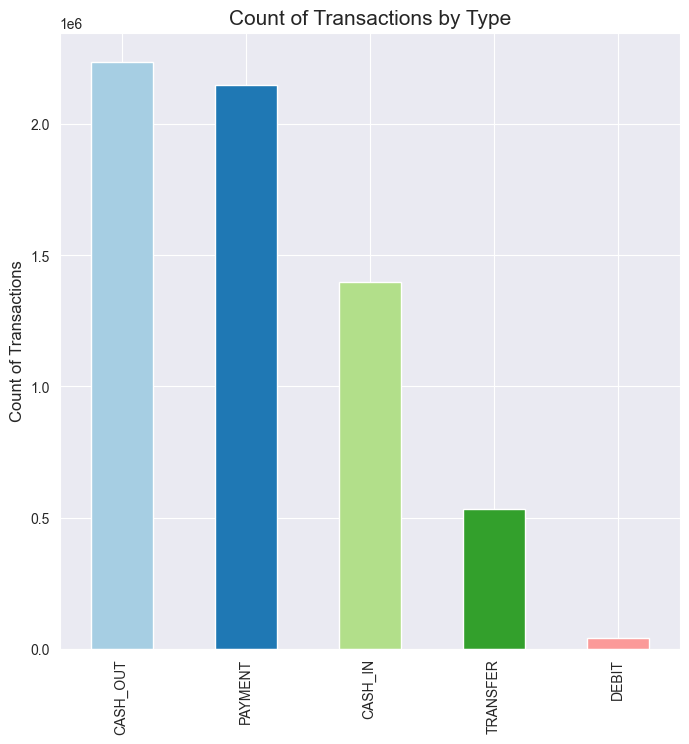

In [13]:
#data exploration for type and transactions
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(4, 2))
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),
                            color=plt.cm.Paired(np.arange(len(df.type.unique()))))
plt.ylabel("Count of Transactions", size=12)
plt.title("Count of Transactions by Type", size=15)
plt.show()

In [14]:
le = preprocessing.LabelEncoder()
df.type = le.fit_transform(df.type) #change categorical into numerical by using label encoder
#most machine learning classifiers don't work with categorical variables

In [15]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0,0


In [16]:
df.describe() #descriptive statistics of all datasets

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,1.71,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,1.35,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,3.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,4.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [17]:
#Setting feature vector and target variable
target_variable = 'isFraud'
y = df.isFraud
#add target variable Severity to y - dependent variable
X = df.drop(['isFraud','isFlaggedFraud'], axis=1)
#remove target variable from x features, and rest are features

In [18]:
print('The shape of X and y are')
print(X.shape, y.shape)

The shape of X and y are
(6362620, 6) (6362620,)


In [19]:
y.head() #show y variable just to double check

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

Why we need to standardise the X features before we run the machine learning model

StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

In [21]:
df3 = pd.DataFrame(x_scaled)
#change to dataframe from array that was created in standard scaler function

In [22]:
df3.columns = X.columns #create column names based on X

In [23]:
df3.head() #check dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.95,-0.28,-0.23,-0.24,-0.32,-0.33
1,0.95,-0.29,-0.28,-0.29,-0.32,-0.33
2,1.69,-0.30,-0.29,-0.29,-0.32,-0.33
3,-0.53,-0.30,-0.29,-0.29,-0.32,-0.33
4,0.95,-0.28,-0.27,-0.28,-0.32,-0.33


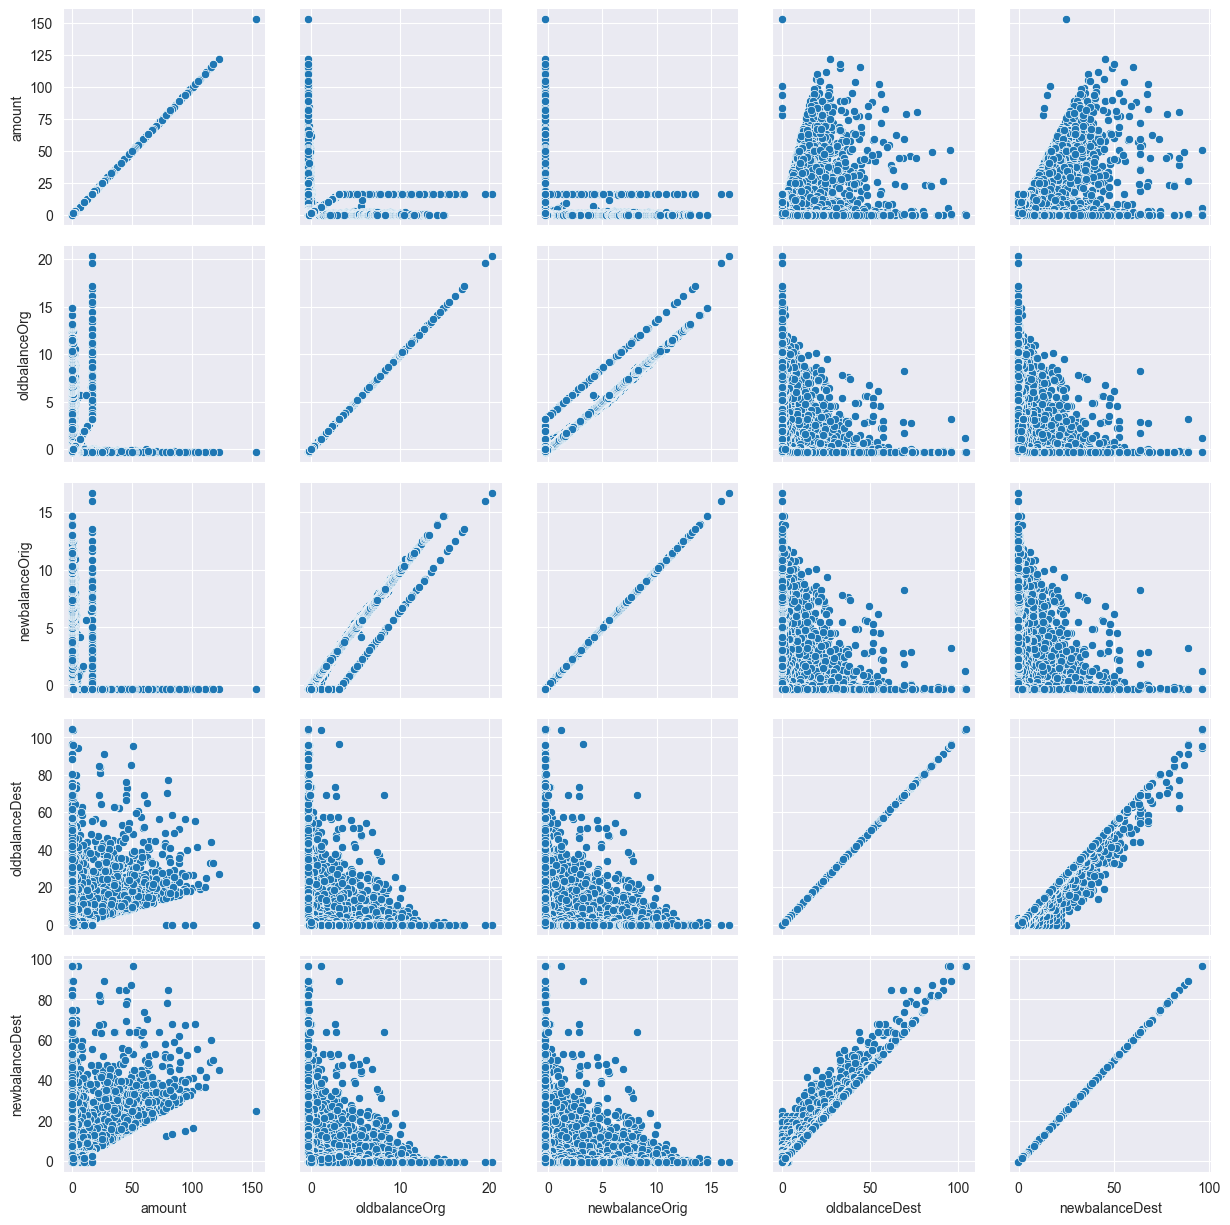

In [24]:
g = sns.PairGrid(df3[['amount',
                      'oldbalanceOrg',
                      'newbalanceOrig',
                      'oldbalanceDest',
                      'newbalanceDest']])
g.map(sns.scatterplot)



#create scatterplot to see the behavior of the features/relationship of features.

#there is a non-linear relationship between OldbalanceOrg and Oldbalancedest and newbalancedest

In [25]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)



# summarize class distribution
print(Counter(y_over))

Counter({0: 8213, 1: 8213})


In [26]:
y_over

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

In [27]:
X_over.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,753.86,139875.00,139121.14,0.00,0.00
1,1,124449.80,510512.00,386062.20,181168.22,305618.02
2,1,467793.39,223.00,0.00,3257320.27,3725113.66
3,1,41242.22,0.00,0.00,192269.52,229895.77
4,1,84928.72,170.00,0.00,0.00,84928.72


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.5,random_state=1,shuffle=True)

In [29]:
len(y_train)

8213

<AxesSubplot: >

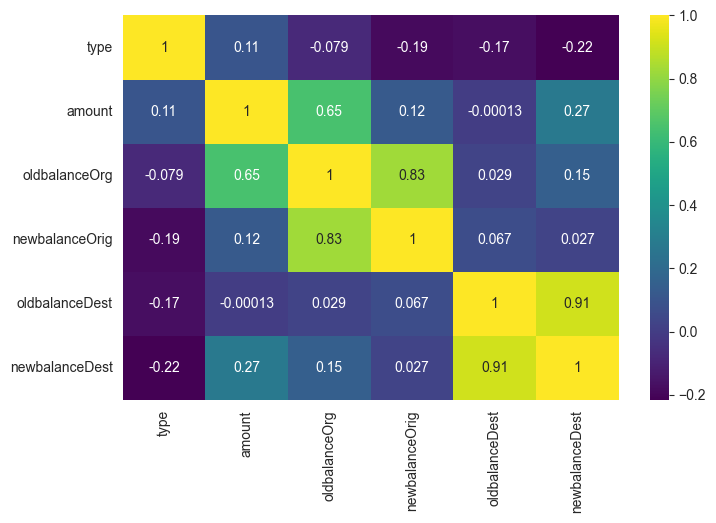

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
corr = X_over.corr()
sns.heatmap(corr, cmap="viridis", annot=True)

#as you can see there is high multicollinearity
#heatmap to show multicollinearity of first 30 features in X,
# python cannot handle displaying over 16k features
#There is multicollinearity between oldBalanceorg and newbalanceOrig,
# Can remove 1 by checking the feature importance to the model.

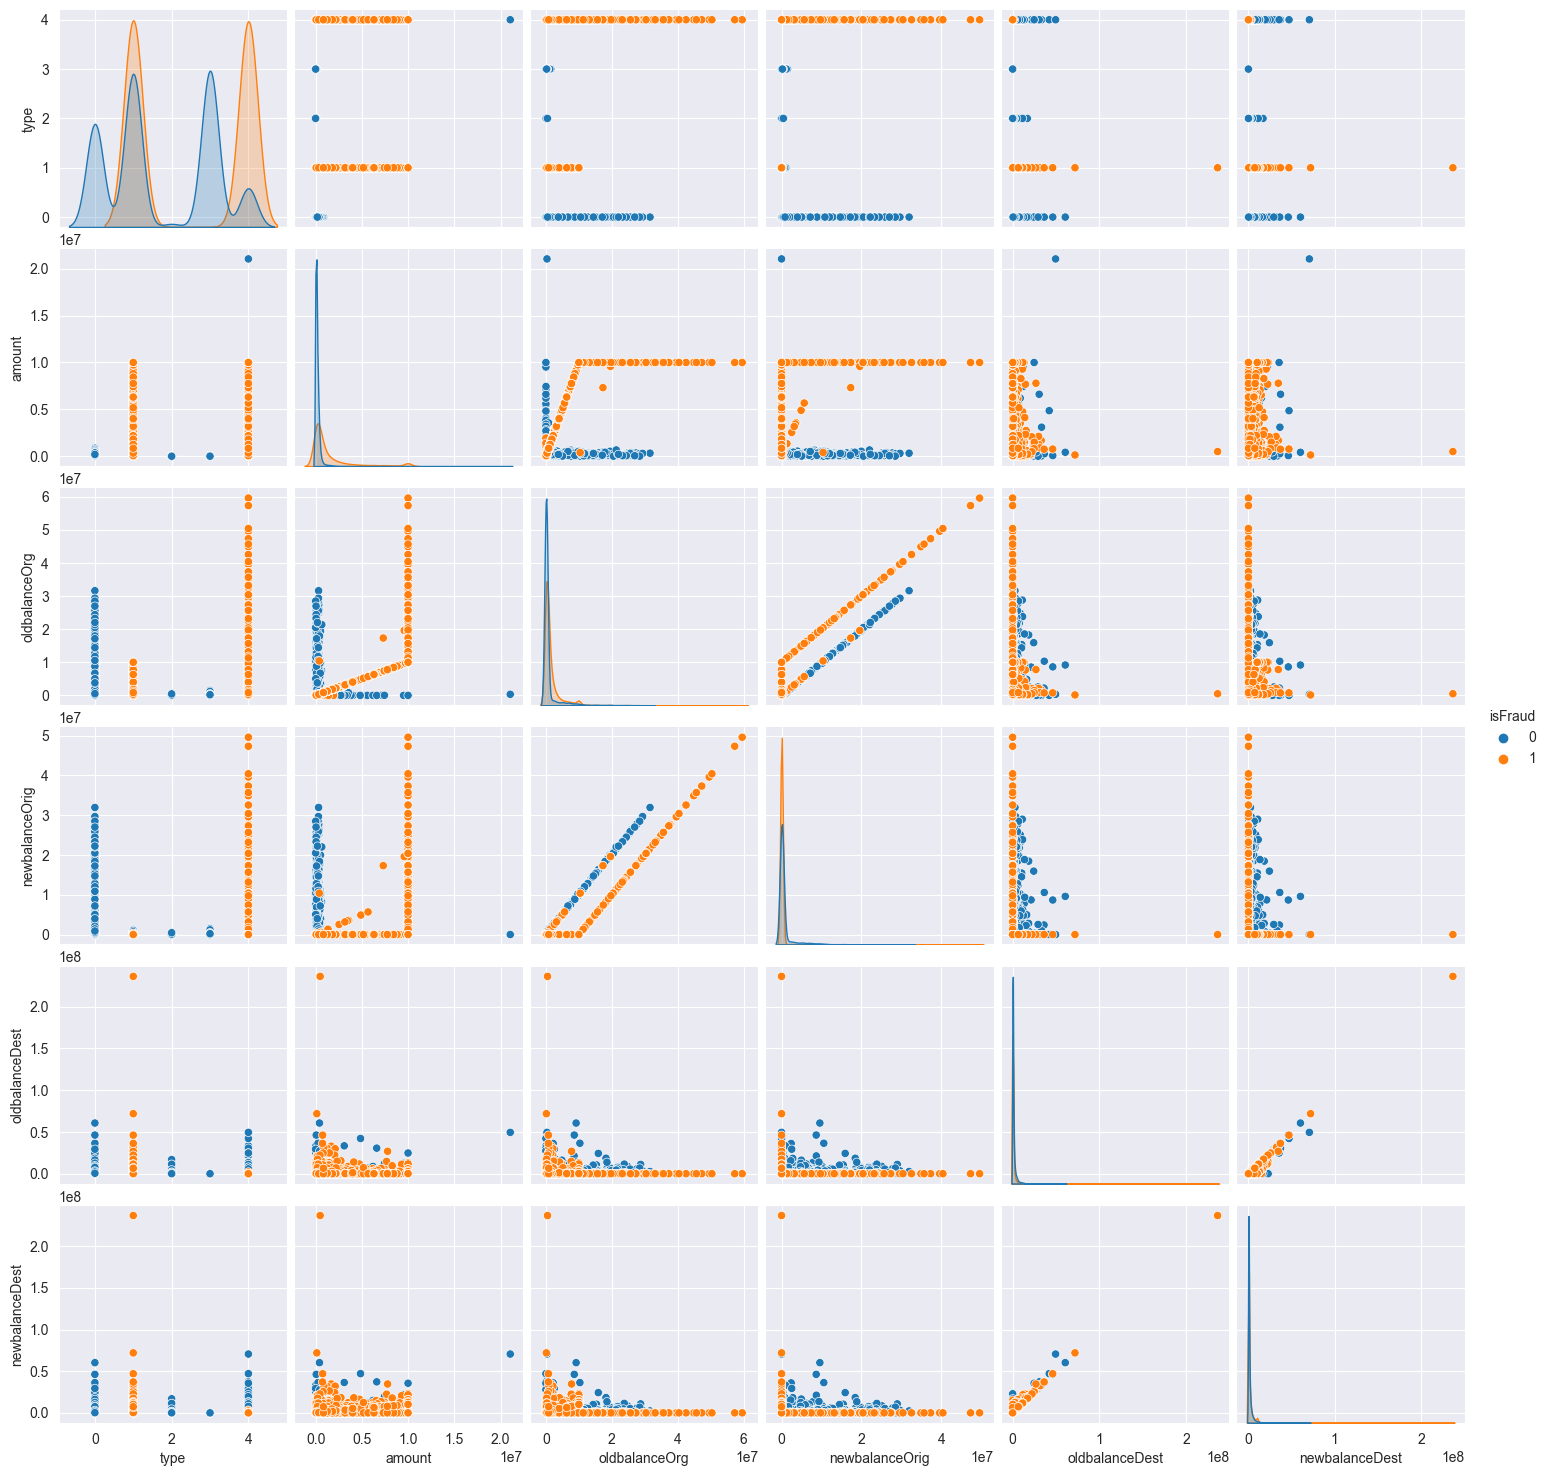

In [31]:
sns.pairplot(pd.merge(X_over,pd.DataFrame(y_over),
                      how="left",left_index=True,
                      right_index=True),
                      hue="isFraud",kind='scatter')

Features Engineering: Feature Importance by Random Forest

In [32]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training set
clf.fit(X_over, y_over)

RandomForestClassifier(random_state=42)

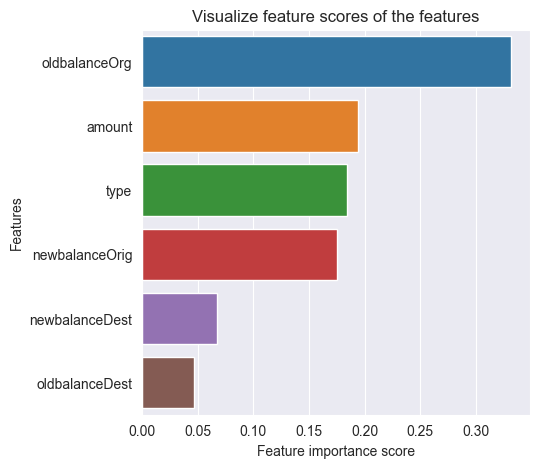

In [33]:
feature_scores = pd.Series(clf.feature_importances_,
                           index=X_over.columns).sort_values(ascending=False)

pd.DataFrame(feature_scores)

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Exploring Classifiers to build final machine learning model

KNN:

In [34]:
## Grid Search KNN
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.942 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.951 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.960 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.943 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.945 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.946 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.942 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.951 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.943 total time=   0.0s
[CV 1/5] END .....................n_neighbors=4;, score=0.940 total time=   0.0s
[CV 2/5] END .....................n_neighbors=4;

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [35]:
knn.best_params_ # best parameter

{'n_neighbors': 3}

In [36]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[3838  236]
 [ 150 3989]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4074
           1       0.94      0.96      0.95      4139

    accuracy                           0.95      8213
   macro avg       0.95      0.95      0.95      8213
weighted avg       0.95      0.95      0.95      8213



Logistic Regression:

In [37]:
param_grid = {'C':[0.1,1,100,1000]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100, 1000]})

In [38]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.1}
0.8115183246073299


In [39]:
lg_model = LogisticRegression(C=0.1,random_state=42)
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

print(confusion_matrix(y_test,lg_pred))
print('\n')
print(classification_report(y_test,lg_pred))

[[2596 1478]
 [  70 4069]]


              precision    recall  f1-score   support

           0       0.97      0.64      0.77      4074
           1       0.73      0.98      0.84      4139

    accuracy                           0.81      8213
   macro avg       0.85      0.81      0.81      8213
weighted avg       0.85      0.81      0.81      8213



Naives Bayes:

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test,gnb_pred)
print(cm_gnb)
print('\n')
print(classification_report(y_test,gnb_pred))
recall = np.diag(cm_gnb) / np.sum(cm_gnb, axis = 1)
print(recall)

[[3898  176]
 [2758 1381]]


              precision    recall  f1-score   support

           0       0.59      0.96      0.73      4074
           1       0.89      0.33      0.48      4139

    accuracy                           0.64      8213
   macro avg       0.74      0.65      0.61      8213
weighted avg       0.74      0.64      0.60      8213

[0.95679921 0.33365547]


Decision tree:

In [41]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[4011   63]
 [  39 4100]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4074
           1       0.98      0.99      0.99      4139

    accuracy                           0.99      8213
   macro avg       0.99      0.99      0.99      8213
weighted avg       0.99      0.99      0.99      8213



Random Forest:

In [42]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[4007   67]
 [  14 4125]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4074
           1       0.98      1.00      0.99      4139

    accuracy                           0.99      8213
   macro avg       0.99      0.99      0.99      8213
weighted avg       0.99      0.99      0.99      8213



Final Machine Learning Classifier Comparison (One code summary based on exploration above)
AUC comparison

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=1000,random_state=42),
               GaussianNB(),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(n_estimators=200,random_state=42),
               KNeighborsClassifier(n_neighbors=4)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\hfara\AppData\Local\Temp\ipykernel_22012\3202254348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\hfara\AppData\Local\Temp\ipykernel_22012\3202254348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\hfara\AppData\Local\Temp\ipykernel_22012\3202254348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\hfara\AppData\Local\Temp\ipykernel_22012\3202254348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

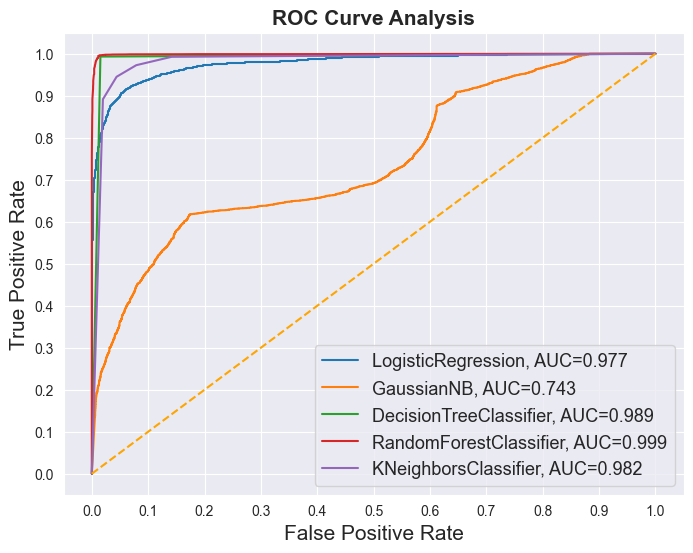

In [44]:
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))


plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [47]:
import tkinter as tk
from tkinter import messagebox
from tkinter import *
#imported packages such as pandas, numpy
import pandas as pd
import numpy as np

# Models from Scikit-Learn
from sklearn import preprocessing

pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv('../Simulation/banking.csv')
df = df.drop(['step','nameOrig', 'nameDest'], axis=1)
le = preprocessing.LabelEncoder()
df.type = le.fit_transform(df.type)
target_variable = 'isFraud'
y = df.isFraud
X = df.drop(['isFraud','isFlaggedFraud'], axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.5,random_state=1,shuffle=True)
##################################

# import the trained model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

# define the mapping from transaction type strings to numbers
type_mapping = {
    'Cash out': 1,
    'Payment': 2,
    'Cash in': 3,
    'Transfer': 4,
    'Debit': 5
}

# define the Tkinter GUI
class FraudDetectorGUI(tk.Tk):
    def __init__(self):
        super().__init__()
        self.geometry("700x400")
        self.configure(background="cyan")
        self.title("Fraud Detector")
        self.iconbitmap('bank.ico')
        self.create_widgets()

    def create_widgets(self):
        # create labels and input fields
        self.title_label = tk.Label(self, text="PLEASE ENTER FEATURES FOR ANOMALY DETECTION", width=41, bg="cyan")
        self.title_label.place(x=200, y=15)
        self.type_label = tk.Label(self, text="Transaction Type:", width=16, bg="cyan")
        self.type_label.place(x=50, y=60)

        # create a drop-down menu for the transaction type
        self.type_var = tk.StringVar(self)
        self.type_var.set('Cash out')  # default value
        self.type_option_menu = tk.OptionMenu(self, self.type_var, *type_mapping.keys())
        self.type_option_menu.place(x=170, y=60)

        self.Amount = StringVar()
        self.OldBalOrg = StringVar()
        self.NewBalOrg = StringVar()
        self.OldBalDest = StringVar()
        self.NewBalDest = StringVar()

        self.amount_label = tk.Label(self, text="Amount:", width=16, bg="cyan")
        self.amount_label.place(x=310, y=60)
        self.amount_entry = tk.Entry(self, textvariable= self.Amount, width=20)
        self.amount_entry.place(x=435, y=60)

        self.old_bal_org_label = tk.Label(self, text="Old Balance Org:", width=16, bg="cyan")
        self.old_bal_org_label.place(x=50, y=100)
        self.old_bal_org_entry = tk.Entry(self, textvariable= self.OldBalOrg, width=20)
        self.old_bal_org_entry.place(x=170, y=100)

        self.new_bal_org_label = tk.Label(self, text="New Balance Org:", width=16, bg="cyan")
        self.new_bal_org_label.place(x=310, y=100)
        self.new_bal_org_entry = tk.Entry(self, textvariable= self.NewBalOrg, width=20)
        self.new_bal_org_entry.place(x=435, y=100)

        self.old_bal_dest_label = tk.Label(self, text="Old Balance Dest:", width=16, bg="cyan")
        self.old_bal_dest_label.place(x=50, y=140)
        self.old_bal_dest_entry = tk.Entry(self, textvariable= self.OldBalDest, width=20)
        self.old_bal_dest_entry.place(x=170, y=140)

        self.new_bal_dest_label = tk.Label(self, text="New Balance Dest:", width=16, bg="cyan")
        self.new_bal_dest_label.place(x=310, y=140)
        self.new_bal_dest_entry = tk.Entry(self, textvariable= self.NewBalDest, width=20)
        self.new_bal_dest_entry.place(x=435, y=140)

        # create a button to submit the input values
        reset = Button(self, text="Reset", width="12", height="1", activebackground="red", command=self.reset, bg="lightblue",
                       font=("Calibri 12 ")).place(x=230, y=180)
        self.submit_button = tk.Button(self, text="Submit", width="12", height="1", activebackground="red", command=self.detect_fraud,  bg="lightblue", font=("Calibri 12 "))
        self.submit_button.place(x=350, y=180)

    def reset(self):
        self.Amount.set("")
        self.OldBalOrg.set("")
        self.NewBalOrg.set("")
        self.OldBalDest.set("")
        self.NewBalDest.set("")

    def detect_fraud(self):
        if self.amount_entry.get() == "":
            user = "Amount Field is Empty!!"
            Label(self, text=user, fg="white", bg="red", font=("Calibri 10 bold")).place(x=270, y=230)
        elif self.old_bal_org_entry.get() == "":
            user = "Old Balance Origin Field is Empty!!"
            Label(self, text=user, fg="white", bg="red", font=("Calibri 10 bold")).place(x=270, y=230)
        elif self.old_bal_dest_entry.get() == "":
            user = "New Balance Origin Field is Empty!!"
            Label(self, text=user, fg="white", bg="red", font=("Calibri 10 bold")).place(x=270, y=230)
        elif self.old_bal_org_entry.get() == "":
            user = "Old Balance Destination Field is Empty!!"
            Label(self, text=user, fg="white", bg="red", font=("Calibri 10 bold")).place(x=270, y=230)
        elif self.new_bal_dest_entry.get() == "":
            user = "New Balance Destination Field is Empty!!"
            Label(self, text=user, fg="white", bg="red", font=("Calibri 10 bold")).place(x=270, y=230)
        else:
            # get the input values from the entry fields
            input_values = [
                type_mapping[self.type_var.get()],
                float(self.amount_entry.get()),
                float(self.old_bal_org_entry.get()),
                float(self.new_bal_org_entry.get()),
                float(self.old_bal_dest_entry.get()),
                float(self.new_bal_dest_entry.get())
            ]
            # convert the input values to a numpy array
            input_array = np.array(input_values).reshape(1, -1)

            # make a prediction using the trained model
            prediction = rfc.predict(input_array)

            # display a message box with the prediction
            if prediction[0] == 0:
                messagebox.showinfo("Fraud Detector", "Transaction is not fraud.")
            else:
                messagebox.showwarning("Fraud Detector", "Transaction is fraud!")
# create an instance of the GUI
app = FraudDetectorGUI()

# start the main event loop
app.mainloop()

TclError: bitmap "bank.ico" not defined